In [70]:
import os

import sys
sys.path.append("..")

import cv2

import numpy as np

from utils.imutils import jimshow as show
from utils.imutils import jimshow_channel as show_channel

import matplotlib.pyplot as plt

In [71]:
filepath = os.path.join("..","..", "cds-vis-data", "data", "img", "terasse.jpeg")

In [72]:
image = cv2.imread(filepath)

In [73]:
image.shape

(1576, 1200, 3)

In [74]:
# Splits the image into color histograms --> cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) 
hist_blue = cv2.calcHist([image], [0], None, [255], [0,256])
hist_green = cv2.calcHist([image], [1], None, [255], [0,256])
hist_red = cv2.calcHist([image], [2], None, [255], [0,256])

In [91]:
hist_blue.shape
hist_green.shape
hist_red.shape

(255, 1)

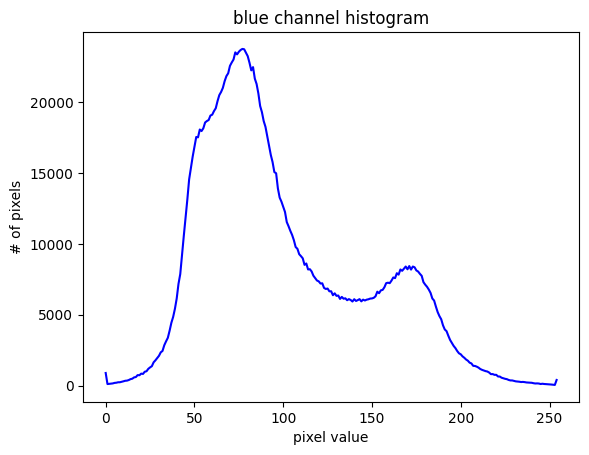

In [78]:
# how to plot blue hist
plt.figure()
plt.plot(hist_blue, color ="blue")
plt.title("blue channel histogram")
plt.xlabel("pixel value")
plt.ylabel("# of pixels")
plt.show()

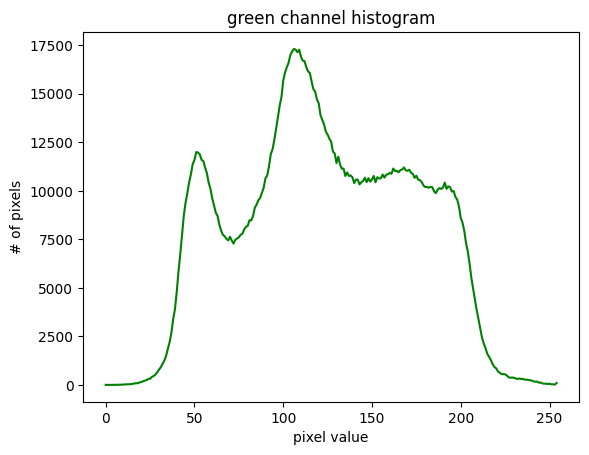

In [79]:
# how to plot green hist
plt.figure()
plt.plot(hist_green, color ="green")
plt.title("green channel histogram")
plt.xlabel("pixel value")
plt.ylabel("# of pixels")
plt.show()


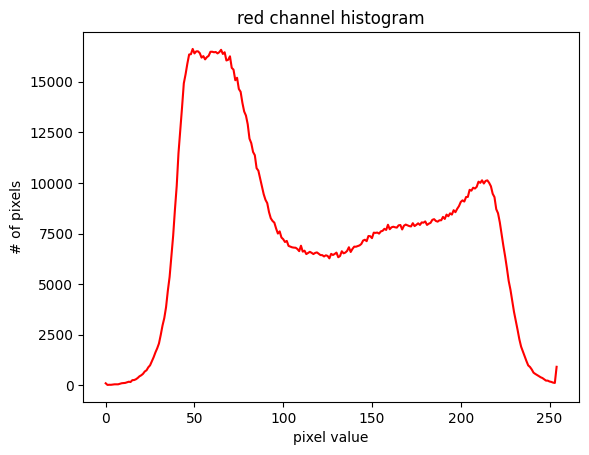

In [80]:
# how to plot red hist
plt.figure()
plt.plot(hist_red, color ="red")
plt.title("red channel histogram")
plt.xlabel("pixel value")
plt.ylabel("# of pixels")
plt.show()

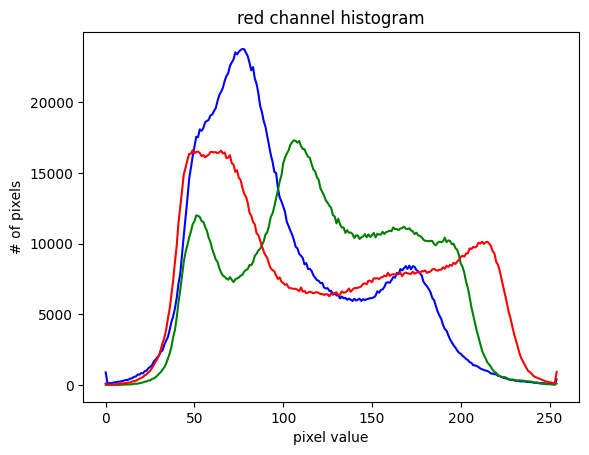

In [81]:
# A way to plot all hist at the same time
plt.figure()
plt.plot(hist_blue, color ="blue")
plt.plot(hist_green, color ="green")
plt.plot(hist_red, color ="red")
plt.title("red channel histogram")
plt.xlabel("pixel value")
plt.ylabel("# of pixels")
plt.show()

In [82]:
# using cv2.split() 

BLUE, GREEN, RED = cv2.split(image)


In [92]:
# Display each array
#BLUE
#GREEN
#RED

In [90]:
# Display each tuple 
#channels

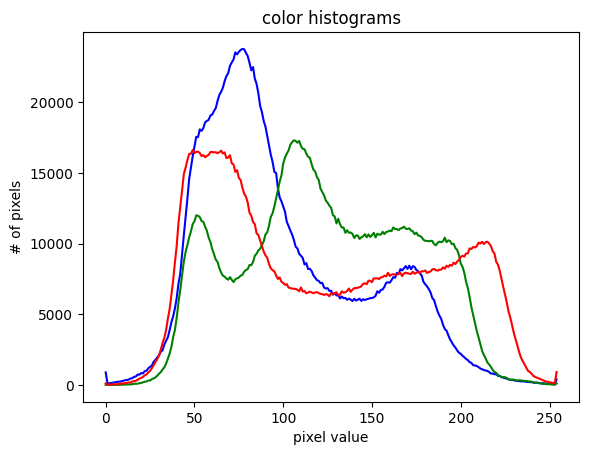

In [88]:
# using for loop to display hist

channels = cv2.split(image)

colors = ("blue", "green", "red")

plt.figure()

plt.title("color histograms")

plt.xlabel("pixel value")

plt.ylabel("# of pixels")

# initialize counter 
i = 0 

for channel in channels:
    # plot hist of values for single channel
    hist = cv2.calcHist([channel], [0], None, [255], [0,256])

    plt.plot(hist, colors[i])
    
    # update counter
    i += 1

plt.show()




In [85]:
# checck type (tuple)
type(channels)

tuple

In [86]:
# checck type (numpy.array)
type(BLUE)

numpy.ndarray

## Comparing histograms

In [104]:
filepath_1 = os.path.join("..","..", "cds-vis-data", "data", "img", "trex.png")
filepath_2 = os.path.join("..","..", "cds-vis-data", "data", "img", "t-rex2.png")

In [105]:
image_1 = cv2.imread(filepath_1)
image_2 = cv2.imread(filepath_2)

In [106]:
# calculate hist for image 1 and 2 seperatly 
hist_1 = cv2.calcHist([image_1], [0,1,2], None, [255, 255, 255,], [0, 256, 0, 256, 0, 256])
hist_2 = cv2.calcHist([image_2], [0,1,2], None, [255, 255, 255,], [0, 256, 0, 256, 0, 256])

In [107]:
hist_1

array([[[  5.,   0.,   1., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]],

       ...,

       [[  0.,   0.,   0

In [114]:
#  normalize the value in the hist arrays (hist_1 = source array and  hist_ 1 = destination array, lower bound, upper bound, function applied to the image )
normalized_hist_1 = cv2.normalize(hist_1, hist_1, 0, 1.0, cv2.NORM_MINMAX)
normalized_hist_2 = cv2.normalize(hist_2, hist_2, 0, 1.0, cv2.NORM_MINMAX)


In [116]:
# normalized_hist_1

In [118]:
# chi-square -->  on way to compare histogram 
# round --> take everything and round it to 2 decimal numbers
# low value --> low distance

round(cv2.compareHist(normalized_hist_1, normalized_hist_2, cv2.HISTCMP_CHISQR),2)

33.76

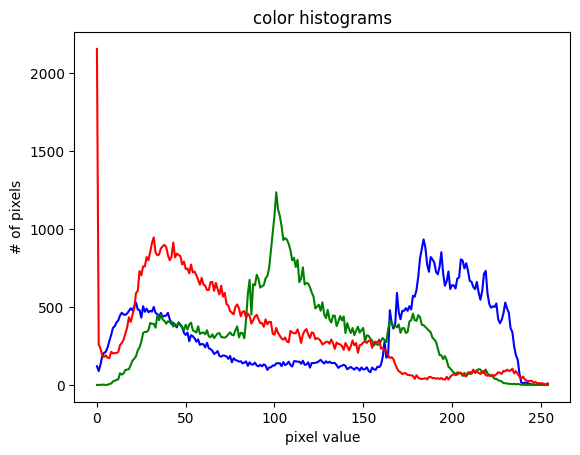

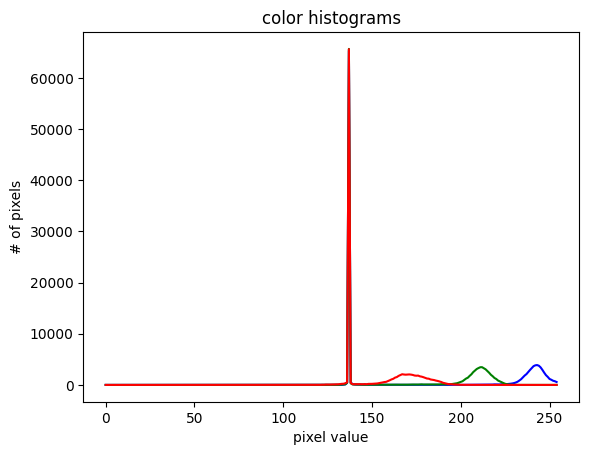

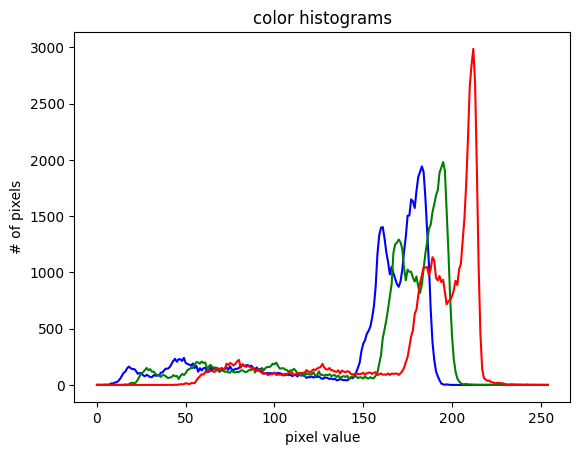

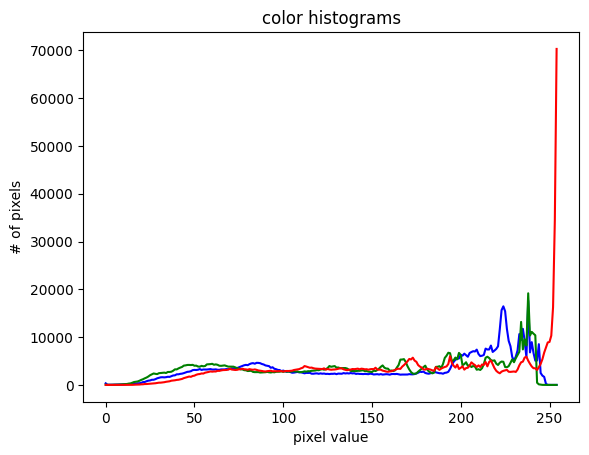

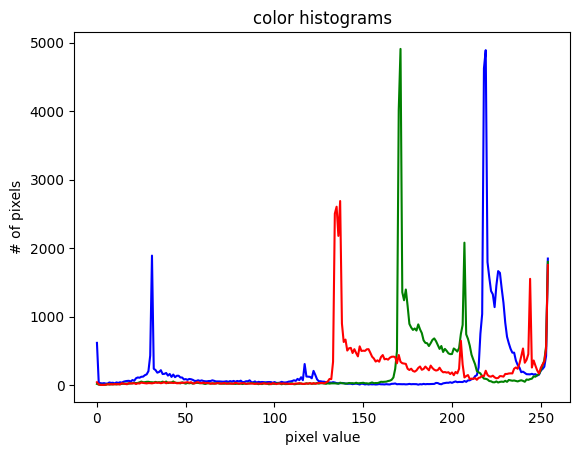

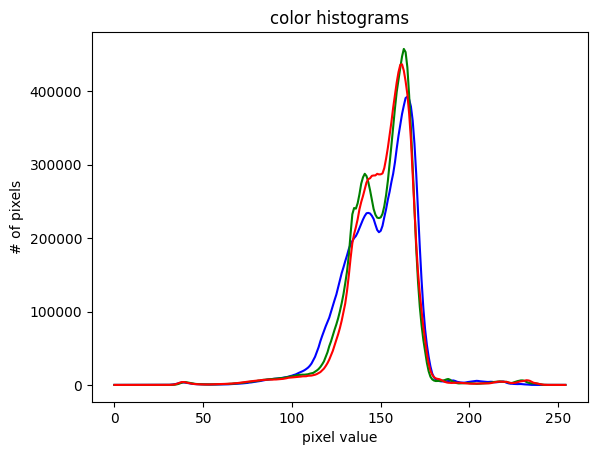

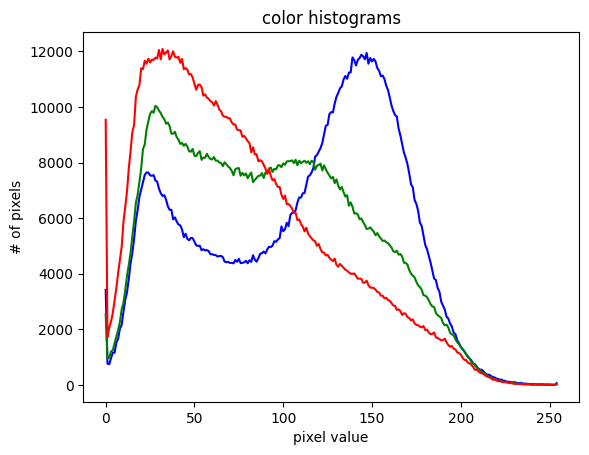

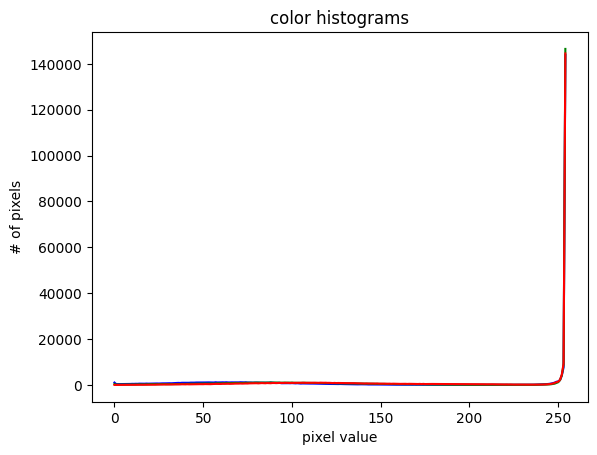

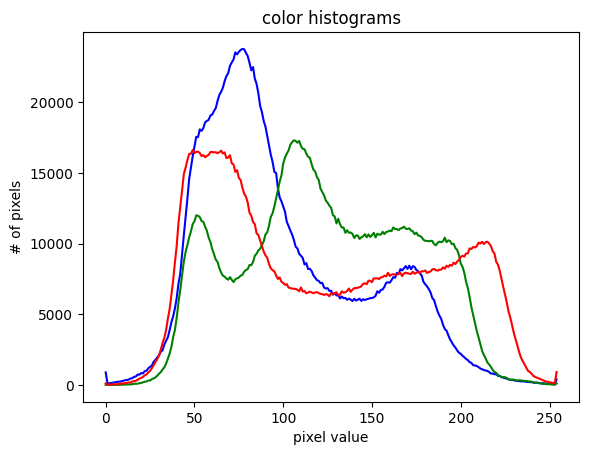

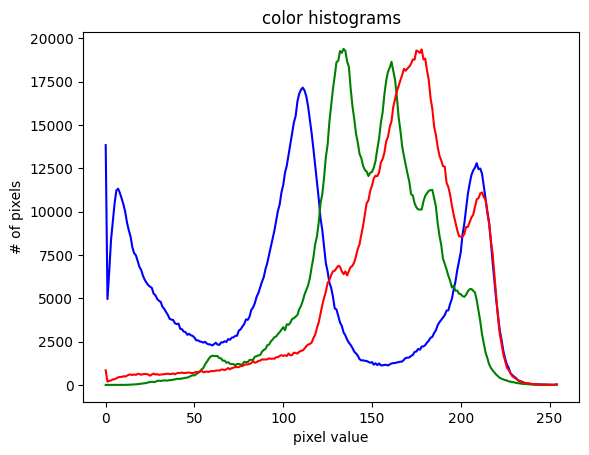

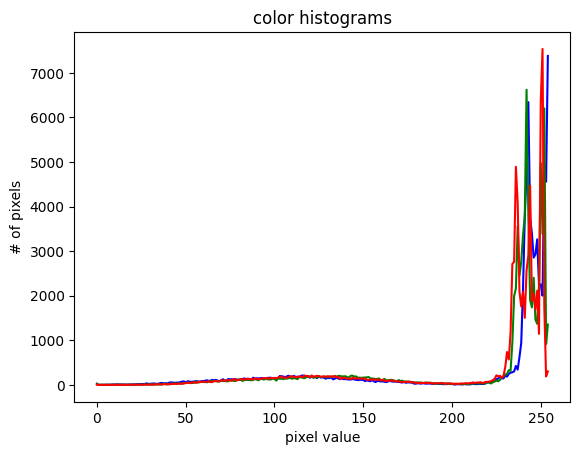

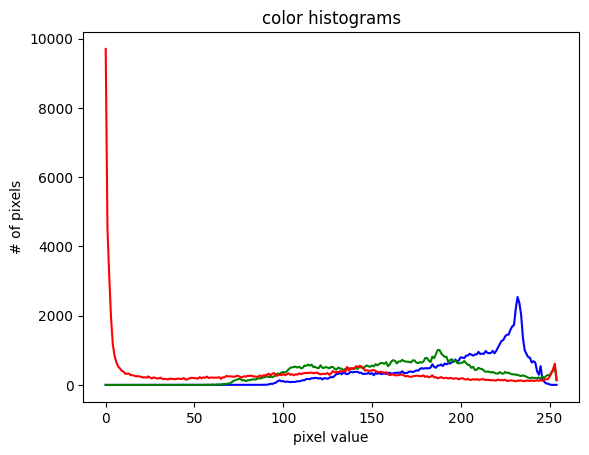

In [166]:
# assignment 1: in class: write a function that analyze all the images in the folder data

folderpath = os.path.join("..","..", "cds-vis-data", "data", "img")

image_files = sorted(os.listdir(folderpath))


for image in image_files:

    image_path = os.path.join(folderpath, image)

    #outpath = os.path.join("..","output", "histogram."+image)

    image = cv2.imread(image_path)

    channels = cv2.split(image)

    colors = ("blue", "green", "red")

    plt.figure()

    plt.title("color histograms")

    plt.xlabel("pixel value")

    plt.ylabel("# of pixels")

    # initialize counter 
    i = 0 

    for channel in channels:
        # plot hist of values for single channel
        hist = cv2.calcHist([channel], [0], None, [255], [0,256])

        plt.plot(hist, colors[i])
        
        # update counter
        i += 1

    plt.savefig(outpath)
    